# Insurance Cost Analysis: Medical Insurance Price Prediction

**Overview**

In today's healthcare industry, accurately predicting medcial insurance costs is essential for both providers and consumers. The cost can vary widely based on factors: age, gender, lifestyle, and health status. The projects aims to build a predictive model that can forecast individual medical insurance prices using key features, helping improve the transparency and fairness of insurance pricing. 

**Objective**

This project's aim is to analyse medical insurance data and develop a predictive model that estimates cost of the medical insurance for an individual. Alongside, this project objective is to showcase below keysteps for data anlayst: 

**key Steps**:

* Data collection and Exploration
* Feature Engineering
* Model Development
* Model Evaluation and Refinement
* Deployment

The above steps has been further breakdown into: 
* Load the data as a pandas dataframe
* Clean the data, taking care of the blank entries
* Run exploratory data analysis (EDA) and identify the attributes that most affect the charges
* Develop single variable and multi variable Linear Regression models for predicting the charges
* Use Ridge regression to refine the performance of Linear regression models.




### Data Description

The dataset consists of various parameters that can influence medical insurance costs. Below is a breakdown of each feature and its significance:

| **Parameter**        | **Description**                                      | **Content Type**            |
|----------------------|------------------------------------------------------|-----------------------------|
| `age`                | Age of the individual in years.                      | Integer                     |
| `gender`             | Gender of the individual. Encoded as 1 for Male and 2 for Female. | Integer (1 or 2)            |
| `bmi`                | Body Mass Index (BMI) – a measure of body fat based on height and weight. | Float                       |
| `no_of_children`     | The number of children/dependents covered by the insurance. | Integer                     |
| `smoker`             | Whether the individual is a smoker (1 for Yes, 0 for No). | Integer (0 or 1)            |
| `region`             | The region of the United States where the individual lives. Encoded as: <br> 1 = Northwest (NW) <br> 2 = Northeast (NE) <br> 3 = Southwest (SW) <br> 4 = Southeast (SE) | Integer (1, 2, 3, or 4)     |
| `charges`            | Annual medical insurance charges for the individual (in USD). This is the **target variable** we are predicting. | Float                       |

### General key Insights:
- **Age, BMI, and smoking status** are likely to be significant predictors of medical insurance costs. Older individuals and those with higher BMI or who smoke might have higher insurance charges.
- **Number of children** and **region** may also influence the insurance cost based on family size and regional healthcare costs.
- The target variable is `charges`, representing the insurance price for each individual in USD.

### Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [3]:
filepath = '/workspaces/DataScience_tutorial/Project/insurance.csv'

In [4]:
df = pd.read_csv(filepath)
df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


As there are no headers. 

In [5]:
#define headers
headers = ['age','gender','bmi','no_of_children','smoker','region','charges']

In [6]:
#add headers to df
df.columns = headers
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


## Data Preprocessing

#### Inspect the data

In [7]:
# get information about data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


Check if there are any non-standard charcters or symbols across the entire dataset

In [8]:
# for this we can use unique () function.
#checking for a single column 'smoke'ArithmeticError
df['smoker'].unique()

array(['0', '?', '1'], dtype=object)

It would be tedious to check like above way using unique in each column separately, so it would be wise to use function

In [9]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column {column}: {unique_values}")

Unique values in column age: ['18' '28' '33' '32' '31' '46' '37' '60' '25' '62' '23' '56' '27' '19'
 '52' '30' '34' '59' '63' '55' '22' '26' '35' '24' '41' '38' '36' '21'
 '48' '40' '58' '53' '43' '64' '20' '61' '44' '57' '29' '45' '54' '49'
 '47' '51' '42' '50' '39' '?']
Unique values in column gender: [2 1]
Unique values in column bmi: [33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84  26.22
 26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3   36.005
 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3   35.6
 26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9   26.6
 36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2   35.625
 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335 27.36
 33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75  28.5
 28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285 37.62
 41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3   38.28
 19.95  19.3   31.6   25.46  30

In the column there is '?'. so we replace that with null values

In [10]:
#replace "?" with NaN
df.replace("?", np.nan, inplace = True)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160


Shortcut method to check direcctly "?"


In [11]:
[df.isin(["?"]).any(axis = 1)]

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 2766    False
 2767    False
 2768    False
 2769    False
 2770    False
 Length: 2771, dtype: bool]

We are free from any non characteristic data in the dataset

## Data Wrangling

Previously, we have already use .info() method to see the general and dataype of dataset in overall.

we can use the same method now to identify the colums having 'null' values information

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


After replacing 'non numeric value' with nan value. 

we can see that in : 

age = There are now 2767 values out of 2771, which means remaining are now 'null' values. 

smoker = There are now 2764 numeric values out of 2771, which means remain are 'null' values. 

So, instead of doing above, we have a difficulty to totalling the null values. So, we can use sum() method instead. 

In [13]:
df.isna().sum()

age               4
gender            0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

It's pretty simple now to count the totol number of null values. 

total null values in: 

age: 4 

smoker: 7

Before handling with above missing values, let's check the data types again: 

In [14]:
print(df['age'].dtype)
print(df['smoker'].dtype)

object
object


The 'age' attribute should be numeric continous and 'smoker' should be categorical, which is binary in this case. 

Therefore, 'age' needs converting to numeric.

In [15]:
df['age'] = pd.to_numeric(df['age'], errors= 'coerce')
df['age'].dtype

dtype('float64')

__Handling with missing values: __

Null values can be deal as below method: 

* replace missing values with the mean for **numeric continouous values**
* replace missing values with the most frquent value for **categorical values**


In [16]:
# handling with age
df['age'].fillna(df['age'].mean(), axis= 0, inplace= True)

/tmp/ipykernel_34528/4199568530.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), axis= 0, inplace= True)


To deal with the categorical, we can directly use mode() method or we can also see which is the most frequent values and can replace with the values.

In [17]:
freuent = df['smoker'].value_counts().idxmax()

df['smoker'].replace(np.nan, freuent, inplace= True)

/tmp/ipykernel_34528/3742858824.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].replace(np.nan, freuent, inplace= True)


In [18]:
# directly using mode method
df['smoker'].fillna(df['smoker'].mode()[0], inplace= True)

/tmp/ipykernel_34528/566583454.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].fillna(df['smoker'].mode()[0], inplace= True)


In the above code, mode()[0] => it ensures that we get the most frequent value from the series. 

In [19]:
df.isna().sum()

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64

Our data is free from missing values

In [20]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18.0,2,33.770,1,0,4,1725.55230
1,28.0,2,33.000,3,0,4,4449.46200
2,33.0,2,22.705,0,0,1,21984.47061
3,32.0,2,28.880,0,0,1,3866.85520
4,31.0,1,25.740,0,0,4,3756.62160


Looking at the charges attributes, has more than 2 decimal places long. 

Round to nearest 2 decimal places. 

In [21]:
df[['charges']] = np.round(df[['charges']], 2)

In [22]:
# another way of rounding
#df['charge'] = df['charge'].round(2)

In [23]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18.0,2,33.770,1,0,4,1725.55
1,28.0,2,33.000,3,0,4,4449.46
2,33.0,2,22.705,0,0,1,21984.47
3,32.0,2,28.880,0,0,1,3866.86
4,31.0,1,25.740,0,0,4,3756.62


## Exploratory Data Analysis(EDA)

Check the distribution of data or statistial information

* patterns or anamolies, outliers in dataset 

Descriptive summary

In [24]:
df.describe()

,age,gender,bmi,no_of_children,region,charges
count,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000
mean,39.117094,1.507398,30.702360,1.102129,2.559726,13260.062288
std,14.078815,0.500036,6.130324,1.214845,1.130934,12153.767157
min,18.000000,1.000000,15.960000,0.000000,1.000000,1121.870000
25%,26.000000,1.000000,26.220000,0.000000,2.000000,4687.800000
50%,39.000000,2.000000,30.495000,1.000000,3.000000,9304.700000
75%,51.000000,2.000000,34.770000,2.000000,4.000000,16516.745000
max,64.000000,2.000000,53.130000,5.000000,4.000000,63770.430000


General Insights from the Statistics:
Age:

The age range is between 18 and 64, which seems appropriate for an insurance dataset.
The mean age is around 39, indicating that the dataset is reasonably balanced in terms of age distribution.
Gender (1 = Male, 2 = Female):

The gender column seems balanced, with a mean close to 1.5 (which is expected if there are roughly equal numbers of males and females in the dataset).
BMI:

The BMI values range from 15.96 to 53.13, which covers both healthy and overweight individuals, making the dataset comprehensive in terms of body weight distribution.
Number of Children:

The maximum number of children is 5, which seems reasonable.
The majority of individuals have fewer children, as indicated by the 50% and 75% percentiles (most have 1 or 2 children).
Region (Categorical, 1-4):

The region column has values ranging from 1 to 4, as expected (representing the four regions of the US).
The mean is close to 2.56, indicating that the regions are reasonably distributed.
Charges:

The insurance charges range from 1,121.87 to 63,770.43 USD, showing a wide variation in costs.
The mean charge is around 13,260 USD, but the high standard deviation (12,153 USD) suggests that there are significant variations in insurance premiums, potentially due to factors like age, BMI, and smoking status.

From above, we can't conlcude that how many males or females distribution or how many regions particularly. So for this, we can use **value_counts()** methods. It is mostly used in categorical variables. 


In [25]:
df['region'].value_counts()

region
4    766
3    683
1    664
2    658
Name: count, dtype: int64

In [26]:
df['gender'].value_counts()

gender
2    1406
1    1365
Name: count, dtype: int64

**Region Distribution:**
- The dataset contains data from four regions, represented numerically from 1 to 4:
  - **Region 4**: 766 entries
  - **Region 3**: 683 entries
  - **Region 1**: 664 entries
  - **Region 2**: 658 entries
- The distribution across regions is fairly even, with Region 4 having the highest representation (766) and Region 2 the lowest (658).

**Gender Distribution:**
- The gender data is coded numerically as 1 and 2:
  - **Gender 2**: 1,406 entries (most likely Female if 1 = Male, 2 = Female)
  - **Gender 1**: 1,365 entries
- The dataset is almost evenly split between the two genders, with a slightly higher count for Gender 2.

**Summary:**
The dataset appears to have a balanced representation across different regions and genders, which is good for ensuring that any analysis or predictive modeling will not be overly biased toward a particular category. The distribution suggests that all regions and genders are well-represented, providing a diverse dataset for analysis.

### Visualizing the distribution

a. Histogram

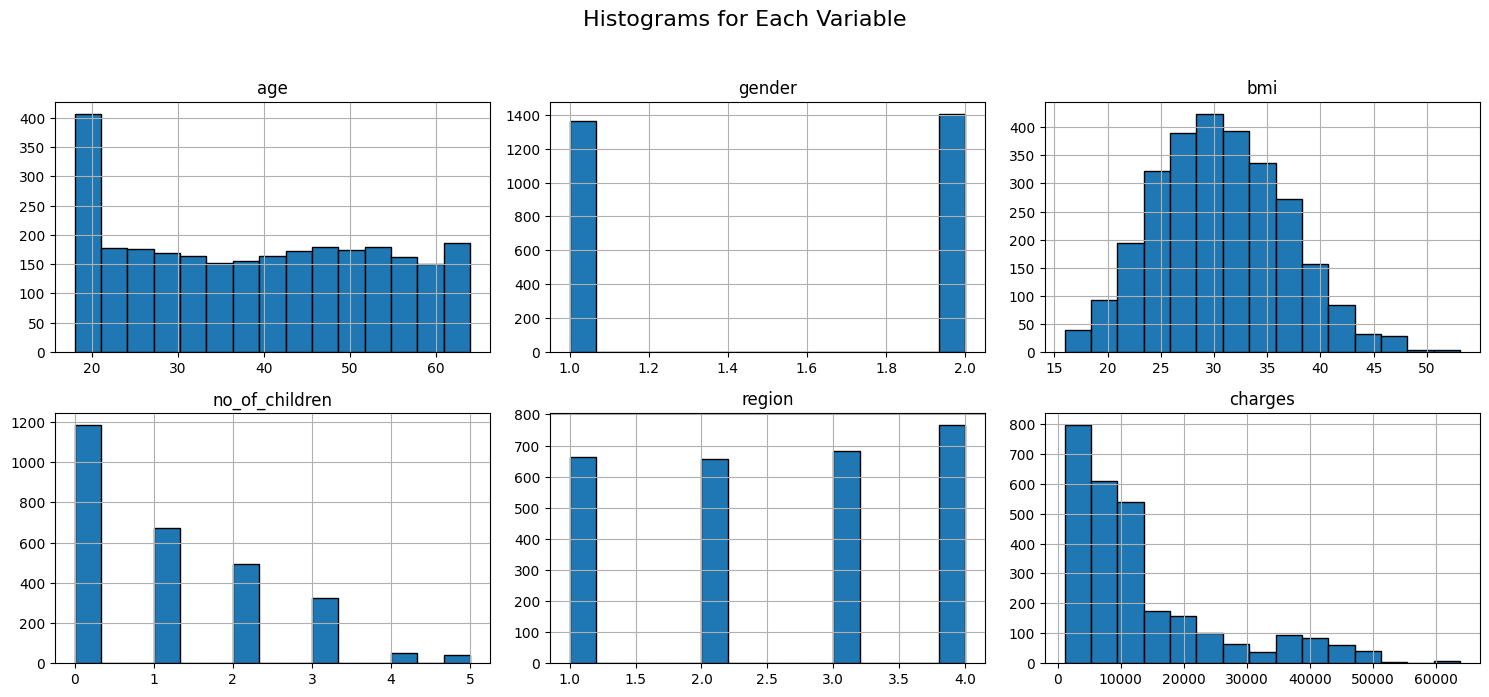

In [27]:
import matplotlib.pyplot as plt

# List of columns for which to plot histograms
columns = ['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region', 'charges']

# Create histograms for each column
df[columns].hist(bins=15, figsize=(15, 10), layout=(3, 3), edgecolor='black')

# Add a title to the figure
plt.suptitle('Histograms for Each Variable', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Let's check one by one

<Axes: >

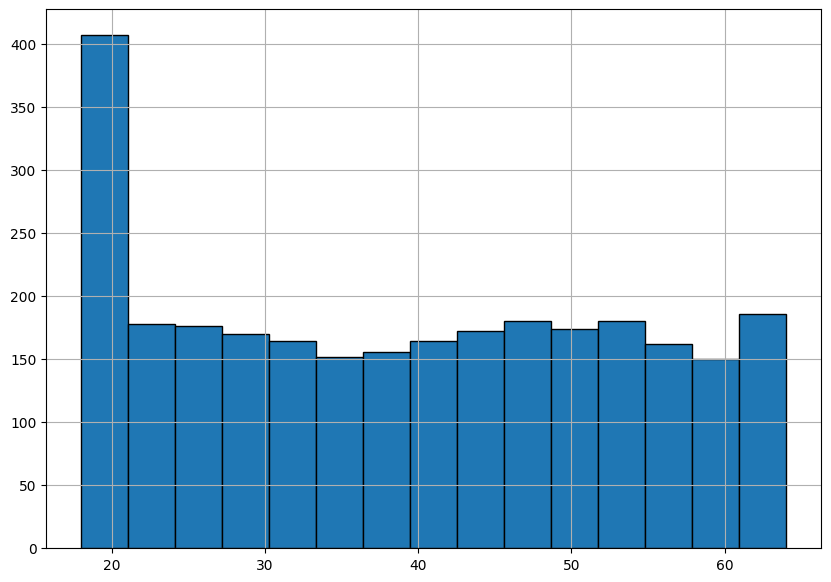

In [28]:
# lets see the distribution of age
df['age'].hist(bins = 15, figsize=(10, 7), edgecolor = 'black')

<Axes: >

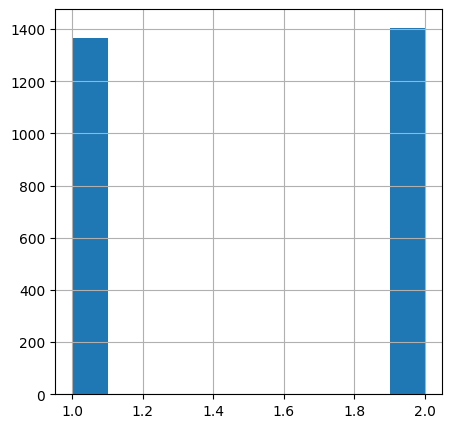

In [29]:
df['gender'].hist(bins = 10, figsize=(5, 5))

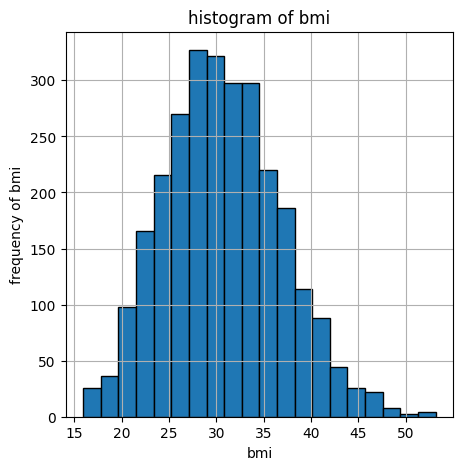

In [30]:
df['bmi'].hist(bins = 20, figsize=(5, 5), edgecolor = 'black')
plt.title("histogram of bmi")
plt.xlabel('bmi')
plt.ylabel('frequency of bmi')
plt.show()

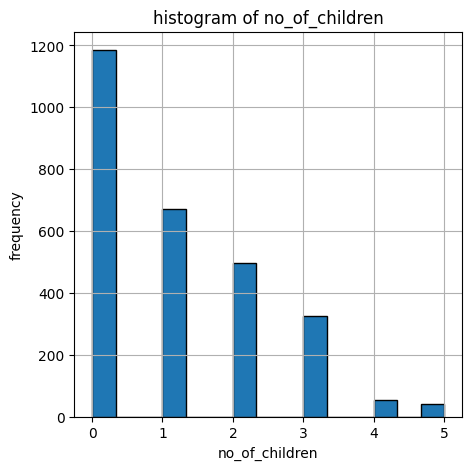

In [31]:
df['no_of_children'].hist(bins= 15, figsize=(5, 5), edgecolor = 'black')
plt.title('histogram of no_of_children')
plt.xlabel('no_of_children')
plt.ylabel('frequency')
plt.show()

/tmp/ipykernel_34528/4201005243.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


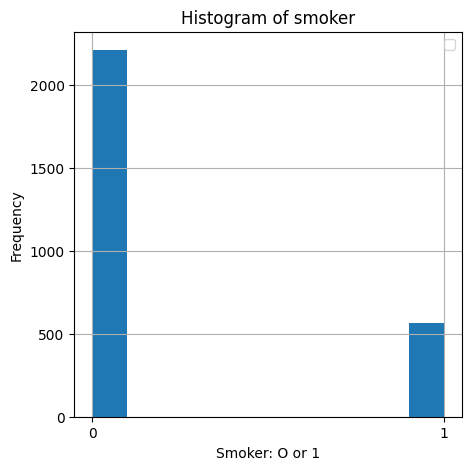

In [32]:
plt.figure(figsize=(5,5))
df['smoker'].hist()
plt.title("Histogram of smoker")
plt.xlabel("Smoker: O or 1")
plt.ylabel('Frequency')
plt.legend()
plt.show()

Text(0, 0.5, 'Frequency')

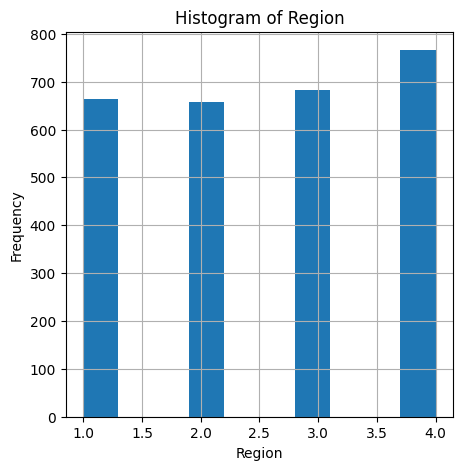

In [33]:
df['region'].hist(figsize=(5,5))
plt.title("Histogram of Region")
plt.xlabel("Region")
plt.ylabel('Frequency')

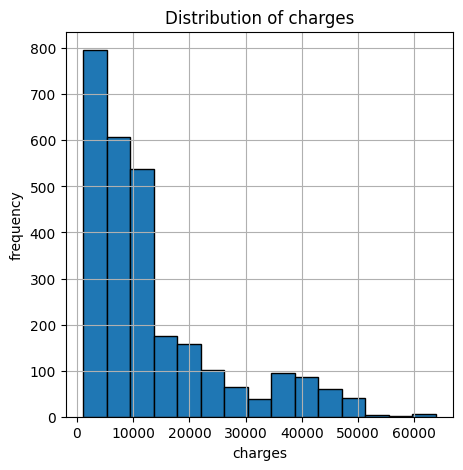

In [34]:
df['charges'].hist(bins=15, figsize=(5, 5), edgecolor = 'black')
plt.title("Distribution of charges")
plt.xlabel('charges')
plt.ylabel('frequency')
plt.show()

Right-Skewed Distribution:

The distribution of insurance charges is right-skewed, meaning most people are paying lower insurance charges, while a smaller group of individuals has significantly higher insurance costs.
This indicates that a large number of people are paying between 0 to 10,000 USD, and only a few are paying extremely high charges (up to 60,000+ USD).
Majority of Charges:

The majority of the data points are concentrated between 0 and 15,000 USD.
There is a steep decline in frequency as the insurance charges increase, with fewer people paying over 30,000 USD.
Potential Outliers:

The long tail of the histogram suggests that there are individuals with very high insurance charges, possibly outliers (those paying more than 50,000 USD). These could be due to special circumstances such as high-risk factors (e.g., smoking, age, pre-existing conditions).

Exponential Drop:

As the charges increase, the frequency of those charges drops sharply, particularly after 20,000 USD, suggesting that most people pay lower insurance premiums, while only a few pay very high premiums.

### boxplot

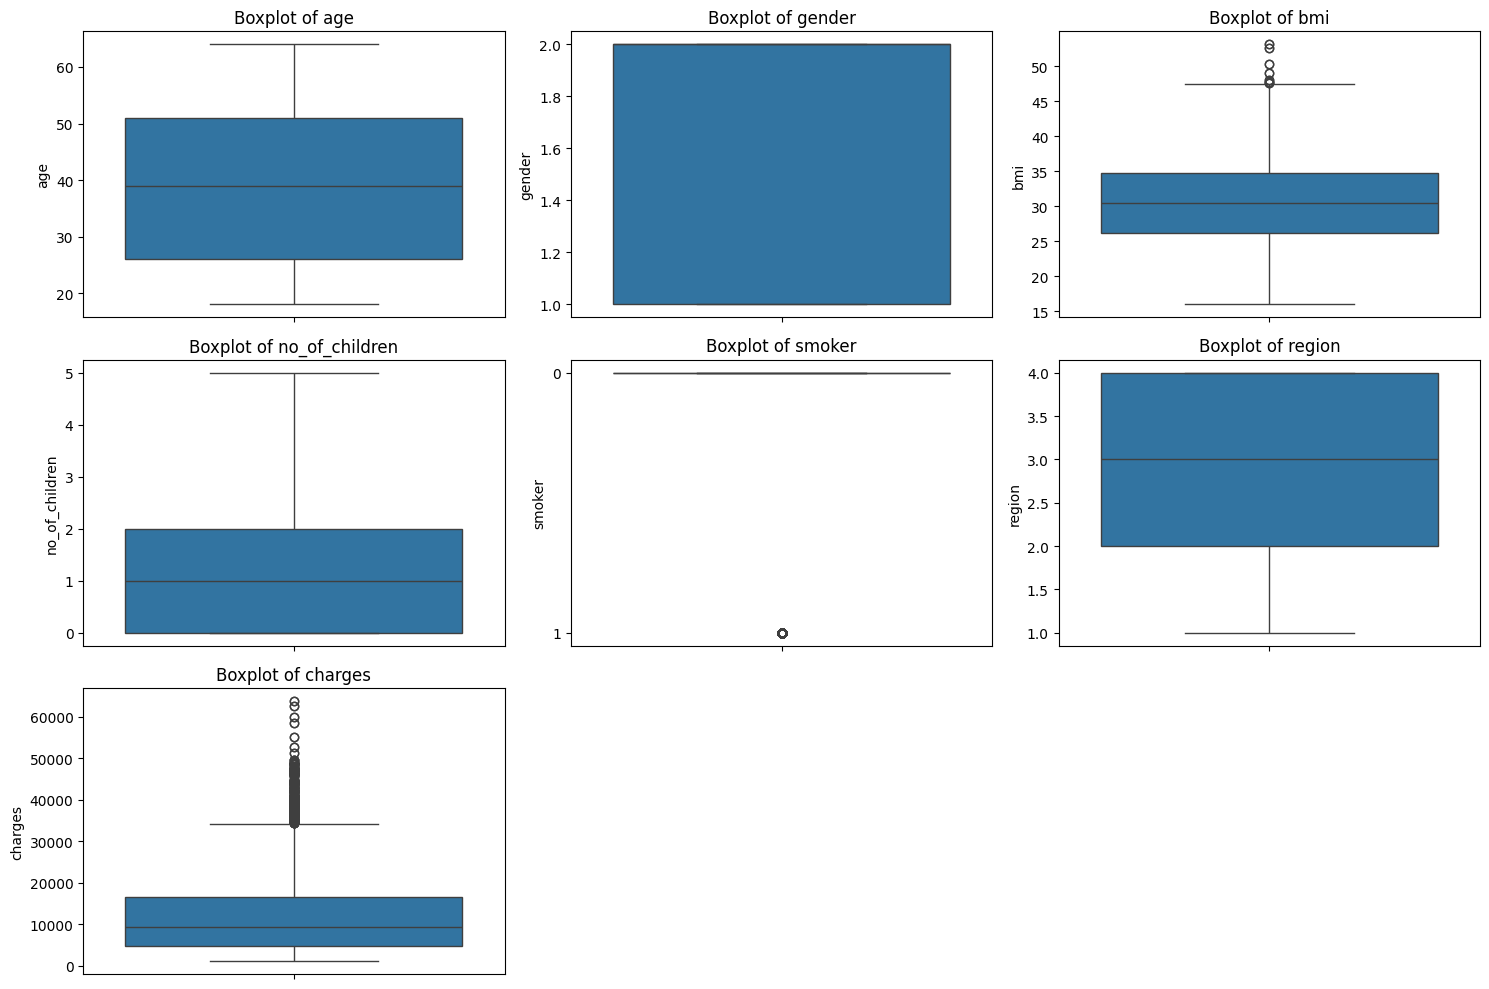

In [35]:
#import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 10))

# Create a boxplot for each column
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

# Add spacing between plots
plt.tight_layout()
plt.show()


<Axes: >

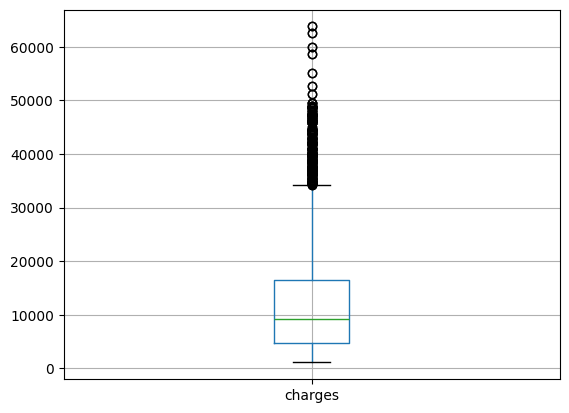

In [36]:
df[['charges']].boxplot()

Text(0.5, 1.0, 'box plot of age')

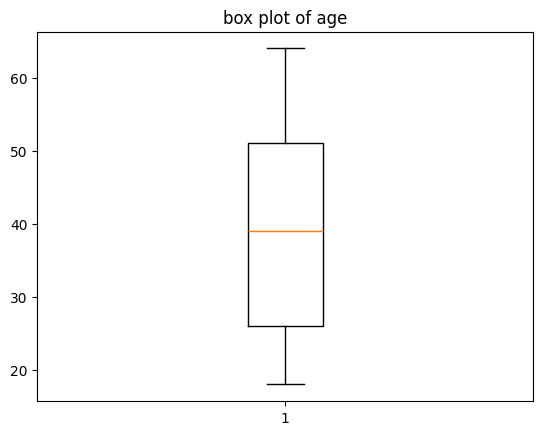

In [37]:
#df[['age']].boxplot(figsize=(5,5),)
plt.boxplot(df['age'])
plt.title("box plot of age")

Text(0, 0.5, 'Freqency of gender')

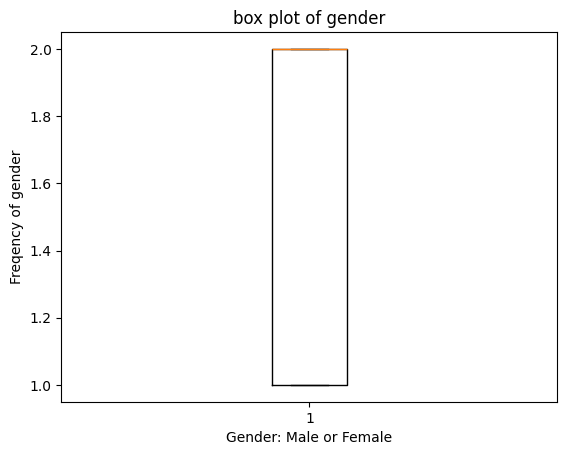

In [38]:
plt.boxplot(df['gender'])
plt.title('box plot of gender')
plt.xlabel('Gender: Male or Female')
plt.ylabel('Freqency of gender')

{'whiskers': [<matplotlib.lines.Line2D at 0x7ee7ec0465d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ee7ebf8b680>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ee7ebf8b3e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ee7ebf8bb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ee7ebf8bdd0>],
 'means': []}

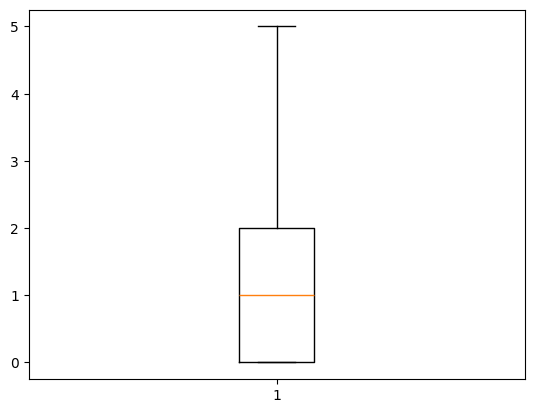

In [39]:
plt.boxplot(df['no_of_children'])

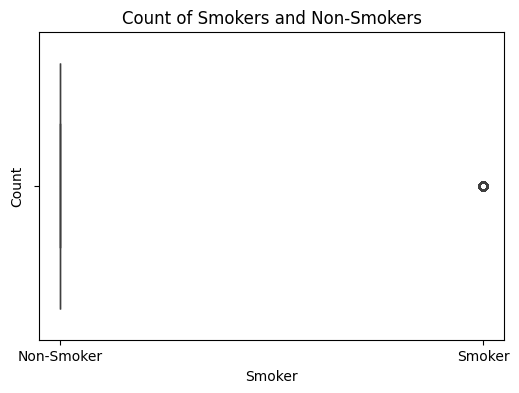

In [48]:
# Create a count plot for the 'smoker' column
plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker', data=df)
plt.title('Count of Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])  # Add labels to the x-axis for clarity
plt.show()


What happened in the previois boxplot is, the smoker is categorical variable and boxplot can be useful to see the distrbution for such a variable, instead it is easily application to numerical variable. If we need to check the boxplot of such a categorical variable, we can use it with taking a reference of some another related variable, as below: 

/tmp/ipykernel_34528/3293146389.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Smoker Status', loc='upper right')


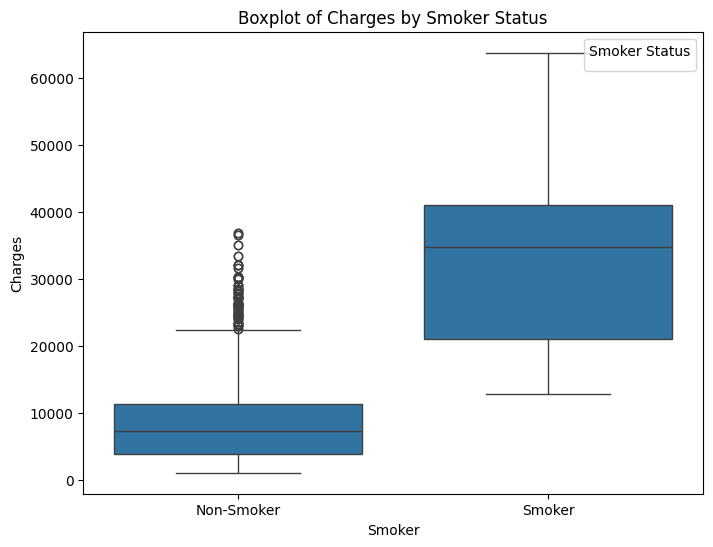

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for 'charges' based on smoker status
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Boxplot of Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])  # Label the x-axis
plt.legend(title='Smoker Status', loc='upper right')
plt.show()

3. visulazation with kde plot

/tmp/ipykernel_34528/2672619328.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
/tmp/ipykernel_34528/2672619328.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
/tmp/ipykernel_34528/2672619328.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
/tmp/ipykernel_34528/2672619328.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


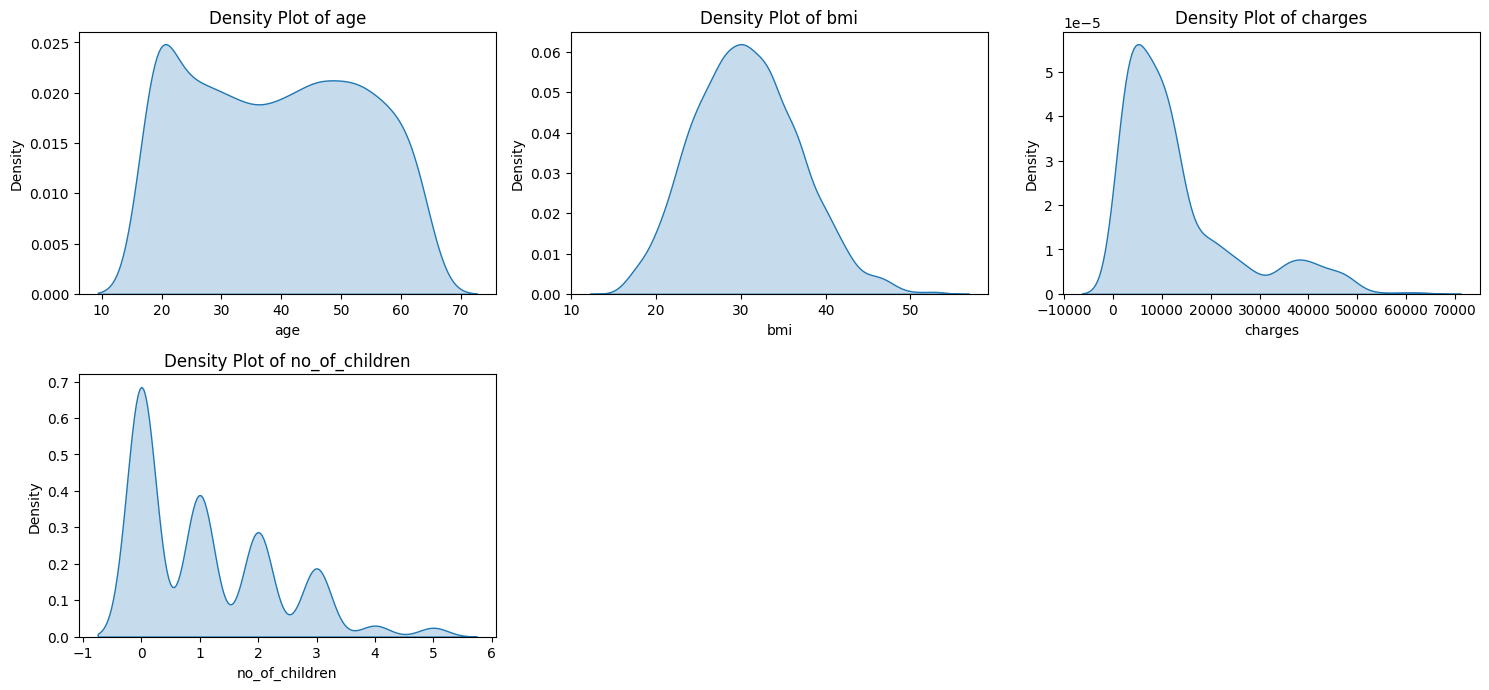

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns for which to plot KDEs
columns = ['age', 'bmi', 'charges', 'no_of_children']  # Ensure these are numerical columns

# Set the figure size
plt.figure(figsize=(15, 10))

# Create a KDE plot for each column
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Density Plot of {col}')

# Add spacing between plots
plt.tight_layout()
plt.show()


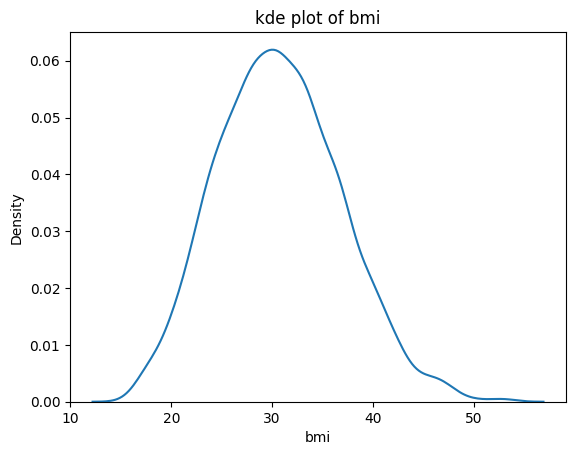

In [63]:
sns.kdeplot(df['bmi'])
plt.title('kde plot of bmi')
plt.show()

Text(0.5, 1.0, 'kde plot for age')

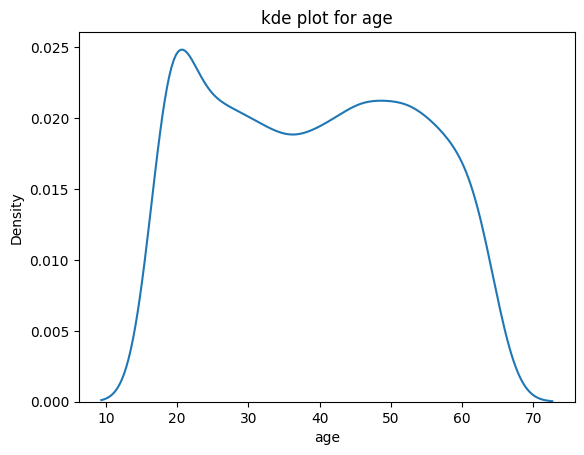

In [64]:
sns.kdeplot(df['age'])
plt.title('kde plot for age')


Text(0.5, 1.0, 'kde  plot for charges')

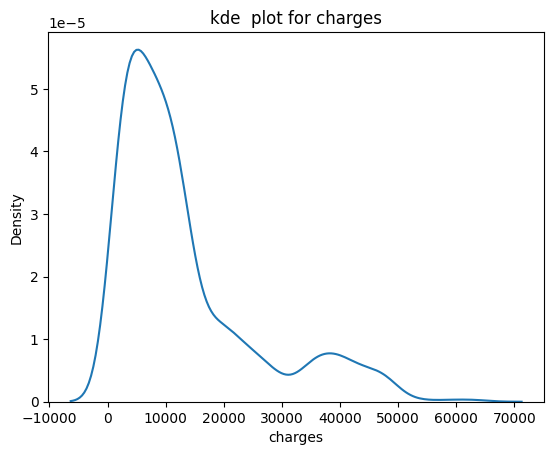

In [65]:
sns.kdeplot(df['charges'])
plt.title('kde  plot for charges')

Now I am gonna show the above plot by creating a function generate sequentially all at once. 

/tmp/ipykernel_34528/2720523973.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column_name], shade=True)


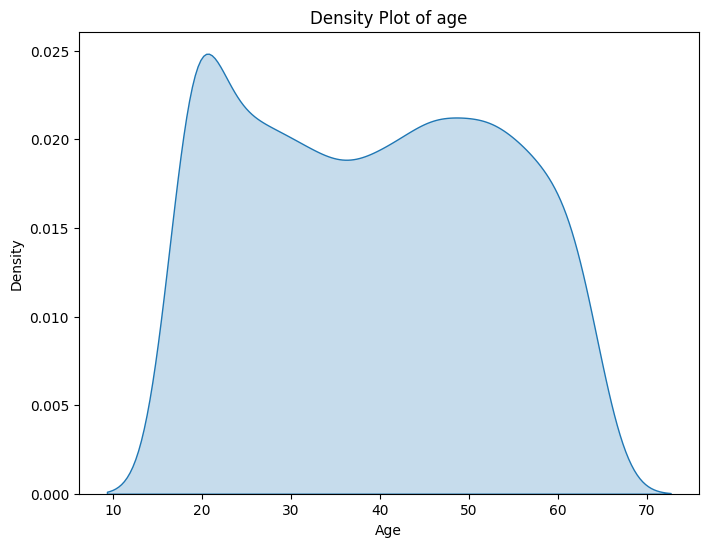

/tmp/ipykernel_34528/2720523973.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column_name], shade=True)


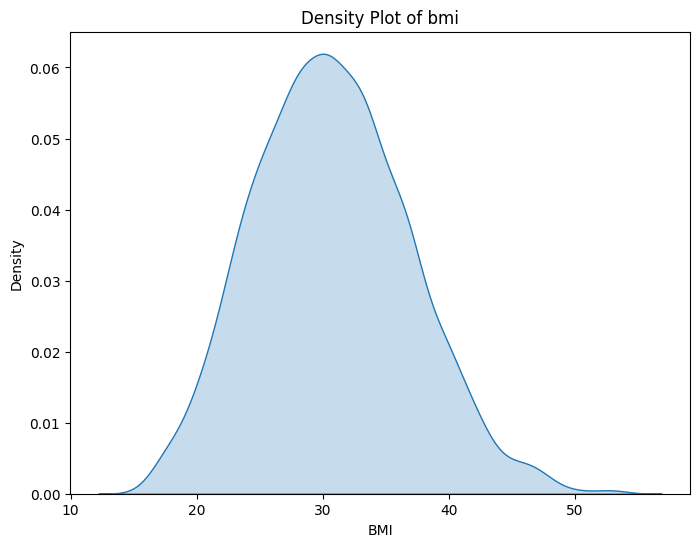

/tmp/ipykernel_34528/2720523973.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column_name], shade=True)


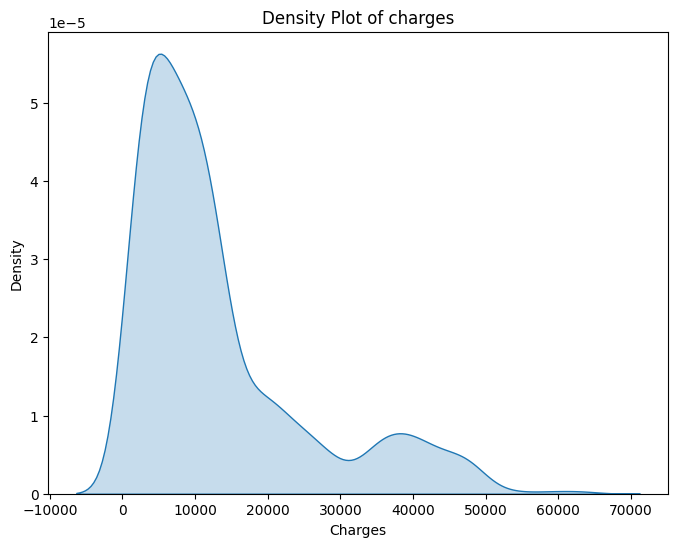

/tmp/ipykernel_34528/2720523973.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column_name], shade=True)


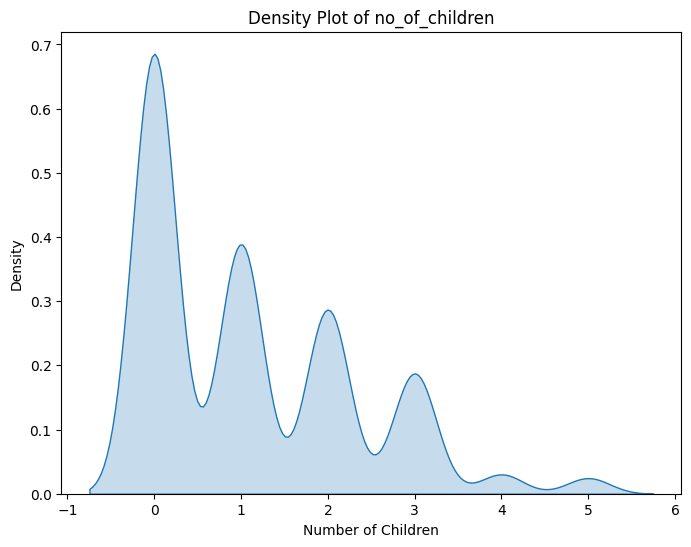

In [66]:

# Function to create a KDE plot for a single variable
def plot_kde(column_name, xlabel):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[column_name], shade=True)
    plt.title(f'Density Plot of {column_name}')
    plt.xlabel(xlabel)
    plt.ylabel('Density')
    plt.show()

# Create KDE plots for each numerical variable
plot_kde('age', 'Age')
plot_kde('bmi', 'BMI')
plot_kde('charges', 'Charges')
plot_kde('no_of_children', 'Number of Children')


### Insights from the Attached KDE Plots:

1. **Age Distribution**:
   - The distribution of age is roughly **bimodal**, with two peaks around **20-25 years** and **50-55 years**. This suggests that the dataset contains two distinct age groups that are more frequent.
   - There is a gradual decline in density as age increases past 60.

2. **BMI Distribution**:
   - The BMI distribution is nearly **normal**, with most individuals having a BMI between **20 and 40**.
   - There are no extreme outliers, but it shows a healthy population distribution, with the **peak around 30** BMI, which might indicate many individuals in the overweight category.

3. **Charges Distribution**:
   - The distribution of `charges` is highly **right-skewed**, with a large number of individuals having lower insurance charges (under $10,000).
   - A smaller group of individuals has significantly higher charges, which could correspond to people with higher risk factors such as smoking, high BMI, or age-related health conditions.
   - This long tail may also indicate the presence of outliers in insurance charges.

4. **Number of Children**:
   - The `no_of_children` column shows a **discrete distribution**, as expected since it contains integer values.
   - Most individuals have **0, 1, or 2 children**, with fewer individuals having 3 or more children. The peaks at 0, 1, and 2 suggest the dataset is skewed toward smaller families or individuals without children.

---

These insights suggest that the dataset has varying distributions for different variables, with some variables like `charges` showing skewness and others like `bmi` being more normally distributed. The dataset also appears to have different subgroups based on age and family size, which could affect insurance pricing and other outcomes in further analysis.


Next: 

The reason the smoker variable did not get plotted in the KDE plot is because KDE plots (Kernel Density Estimate plots) are designed for continuous numerical data, whereas the smoker variable is likely categorical (binary: 0 = Non-Smoker, 1 = Smoker).

A KDE plot requires a variable with continuous values (such as age, bmi, charges), and does not work well with categorical or discrete binary variables because they don't have a smooth, continuous distribution.